#  1. Background 

In [1]:
# First import the necessary libraries
import numpy as np, pandas as pd

# Load the data
path_to_dataset = '../data/raw/Sales_Transaction_v.4a.csv'
data = pd.read_csv(path_to_dataset)
data.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [2]:
print(f'Data shape: {data.shape} \n')
data.info()

Data shape: (536350, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


## Dataset Overview and Importance

The dataset used in this project consists of online sales transaction data from 2018 to 2019. It comprises 536,350 rows and 8 columns, representing customer purchases. This dataset provides a rich source of information for analysing customer purchasing behaviors, product performance, and regional sales trends. By leveraging this data, businesses can gain insights to enhance decision-making processes such as inventory management, marketing strategies, and customer relationship management.

# 2. Data Cleaning and Transformation

## 2.1 Identifying and Handling Missing Data

In [3]:
data.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

### Missing Data Overview
The dataset contains a negligible amount of missing values. Specifically:

- **CustomerNo**: 55 missing entries.
  - These represent anomalies as they lack customer information.

Since the missing entries make up a very small proportion of the dataset, they can be safely removed to maintain data quality.


In [4]:
data = data.dropna(subset=['CustomerNo'])

In [5]:
data.nunique()

TransactionNo    23168
Date               305
ProductNo         3767
ProductName       3767
Price              527
Quantity           507
CustomerNo        4738
Country             38
dtype: int64

### Data Overview

- **Total Transactions**: 23,204
- **Total Items Sold**: 536,350
  - Most transactions included more than one item in the basket.

- **Time Period**: Spread across **305 unique dates**, suggesting transactions are distributed over almost a year.

- **Product Information**:
  - **Unique Products**: 3,768
    - Each product has a unique identifier (ProductNo) and corresponds to a unique name (ProductName).
  - **Unique Prices**: 530
    - A wide range of prices indicates varying product costs, suitable for further price trend and outlier analysis.

- **Sales Quantities**:
  - **Unique Quantities**: 510
    - Indicates diverse purchase sizes, from single items to bulk orders.

- **Customer Base**:
  - **Unique Customers**: 4,738
    - Represents a relatively large customer base, ideal for segmentation and behavior analysis.


## 2.2 Unique Product Analysis

In [6]:
# Check number of unique ProductNo
print('Number of unique ProductNo:', data['ProductNo'].nunique())

# Check number of unique ProductName
print('Number of unique ProductName:', data['ProductName'].nunique())

# Lets check that each ProductNo corresponds to only one ProductName
data.groupby('ProductNo')['ProductName'].nunique().value_counts()


Number of unique ProductNo: 3767
Number of unique ProductName: 3767


ProductName
1    3767
Name: count, dtype: int64

## 2.3 Text Normalisation and Data Type Formatting

In [7]:
# Check the data types 
data.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

From the analysis above:

`TransactionNo`
- Type: strings
- Reason: Unique identifiers not meant for numerical operations.

`Dates`
- Type: format='%m/%d/%Y'
- Reason: Easier date manipulation, filtering, and calculations.

`ProductNo`
- Type: category
- Reason: Limited unique values, allows grouping and aggregation.

`ProductName`
- Type: String
- Reason: Allows for future nlp analysis. 

`Country`
- Type: category
- Reason: Finite set of categories.

In [8]:
# Check if any customer number has anything else other than zero after the decimal point
data['CustomerNo'].apply(lambda x: x.is_integer()).value_counts()



CustomerNo
True    536295
Name: count, dtype: int64

In [9]:
# Formating TransactionNo column
data['TransactionNo'] = data['TransactionNo'].astype(str)

# Formating the Date column
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Formating ProductNo column
data['ProductNo'] = data['ProductNo'].astype('category')

# Formating ProductName column
data['ProductName'] = data['ProductName'].str.upper() # Convert to uppercase
data['ProductName'] = data['ProductName'].astype('str')

# Formating Country column
data['Country'] = data['Country'].str.upper() # Convert to uppercase
data['Country'] = data['Country'].astype('category')

# Formating CustomerNo column
# First remove the decimal points as they are not needed because they dont add any value
data['CustomerNo'] = data['CustomerNo'].astype(int)
# Convert to category
data['CustomerNo'] = data['CustomerNo'].astype('category')

data.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,SET OF 2 WOODEN MARKET CRATES,21.47,12,17490,UNITED KINGDOM
1,581475,2019-12-09,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,10.65,36,13069,UNITED KINGDOM
2,581475,2019-12-09,23235,STORAGE TIN VINTAGE LEAF,11.53,12,13069,UNITED KINGDOM
3,581475,2019-12-09,23272,TREE T-LIGHT HOLDER WILLIE WINKIE,10.65,12,13069,UNITED KINGDOM
4,581475,2019-12-09,23239,SET OF 4 KNICK KNACK TINS POPPIES,11.94,6,13069,UNITED KINGDOM


## Segregating Product Returns

In [10]:
# Count negative values of Price column
print('Negative values of Price column:', data[data['Price'] < 0].shape[0]) 

# Count negative values of Quantity column
print('Negative values of Quantity column:', data[data['Quantity'] < 0].shape[0])

# Count TransactionNo that start with a C
print('TransactionNo that start with a C:', data[data['TransactionNo'].str.startswith('C')].shape[0])

Negative values of Price column: 0
Negative values of Quantity column: 8531
TransactionNo that start with a C: 8531


Negative numbers in the Quantity column and transaction numbers that start with 'C' often represent user returns in datasets like this. We need to collect and store all the returns in a separate dataset, as returns will not be needed for further analysis.

In [11]:
# Filter out returns based on negative Quantity and TransactionNo starting with 'C'
returns = data[(data['Quantity'] < 0) | (data['TransactionNo'].str.startswith('C'))]

# Remove returns from the original dataset
data = data[~((data['Quantity'] < 0) | (data['TransactionNo'].str.startswith('C')))]

# Save the returns to a separate dataset
returns.to_csv('../data/preprocessed_data/returns_dataset.csv', index=False)

# 3. Exploratory Data Analysis

## 3.1 Detecting Outliers

We will only work with purchases that are made domestically as the rest contribute to a very small sale percentage.


In [12]:
# Count ratio of transcation that are made in uk and elsewhere
data['Country'].value_counts(normalize=True)[:10]

Country
UNITED KINGDOM    0.905272
FRANCE            0.019693
GERMANY           0.019403
EIRE              0.014793
BELGIUM           0.004750
SPAIN             0.004521
NETHERLANDS       0.004407
SWITZERLAND       0.004364
PORTUGAL          0.003483
AUSTRALIA         0.003090
Name: proportion, dtype: float64

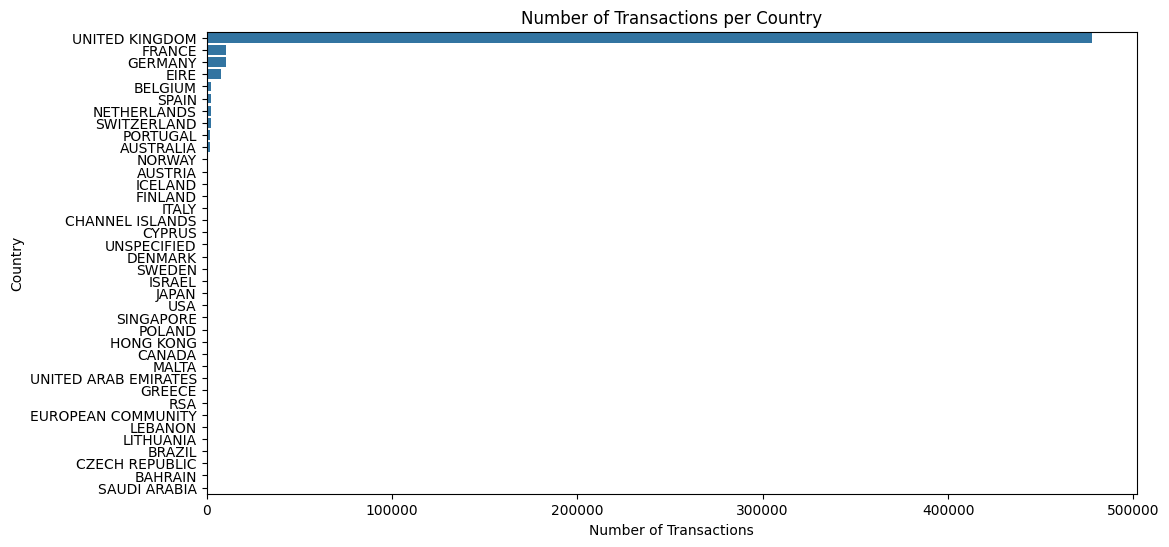

In [13]:
# Visualise Countries 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Number of Transactions per Country')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()


### Focusing on Transactions Made in the UK: Rationale

#### Reason for Choosing UK Transactions
The dataset reveals that **90.5% of all transactions** were conducted in the United Kingdom (UK), while the remaining 9.5% are distributed across various other countries, each contributing less than 2% individually. This overwhelming dominance of UK transactions makes it a logical focus for the analysis, as it provides a substantial, high-quality dataset to draw meaningful insights. Narrowing the scope to UK transactions helps:

#### Ratio of UK vs. Non-UK Transactions
Based on the normalized value counts for the `Country` column:

- **UK Transactions**: 90.5%
- **Other Countries**: 9.5% (spread across 37 countries, with each contributing less than 1% of total transactions).


By refining the scope, the analysis can provide actionable insights specifically for the UK market, which is the most significant contributor to the dataset.


In [14]:
# Save international sales to a separate dataset
international_sales = data[data['Country'] != 'UNITED KINGDOM']
international_sales.to_csv('../data/preprocessed_data/international_sales.csv', index=False)

# Delete international sales from the original dataset
data = data[data['Country'] == 'UNITED KINGDOM']

### 3.1.1 Price and Quantity.

#### Interquartile Range (IQR)

In [15]:
# Exploration of numerical data.
data[['Price', 'Quantity']].describe()

,Price,Quantity
count,477770.000000,477770.000000
mean,12.619749,9.770145
std,7.958228,164.116140
min,5.130000,1.000000
25%,10.920000,1.000000
50%,11.940000,3.000000
75%,14.090000,10.000000
max,660.620000,80995.000000


In [16]:
# Lets calculate IQR (inter quartile range) for Price and Quantity
Q1 = data[['Price', 'Quantity']].quantile(0.25)
Q3 = data[['Price', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

# Lets calculate the number of potential outliers in Price and Quantity
outliers = (data[['Price', 'Quantity']] < (Q1 - 1.5 * IQR)) | (data[['Price', 'Quantity']] > (Q3 + 1.5 * IQR))
print('Potential outliers in Price and Quantity:\n', outliers.sum())

Potential outliers in Price and Quantity:
 Price       50633
Quantity    46243
dtype: int64


This is a large number of outliers we can not just use IQR to define outliers because if we will we will loose a big chunk of data. We would need to do further data analysis to detect outliers. 


- Extremly high std in Quantity and reletivly high std in Price suggest that there are outliers and that the data needs cleaning. Furthermore the mean price for an item is 12.66$ where the max amount is 660. We would need to eliminate those anomalises.  



#### Graphical Verification

#### Box and Violin Plots For Detecting Anomalies at Quantity and Price

This is not your audience. Your audience is stock holders business owners and people with some knowledge of the analysis but not all. 

Logarithmic values were used instead of raw data because the distribution of the original data is too large. This large distribution makes the normal box or violin plot less meaningful. By applying a logarithmic transformation, the scale of the data is compressed, allowing for better visualisation and interpretation of the distribution and outliers. You can check the original data box plot in the archive folder.


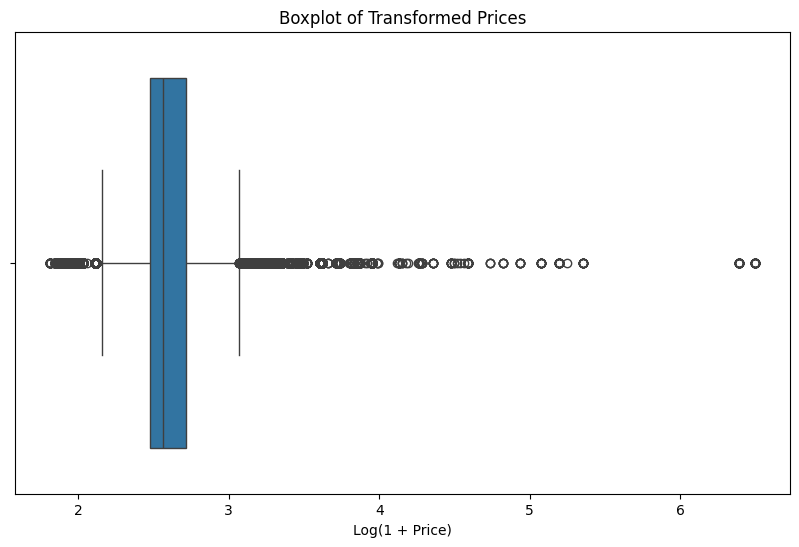

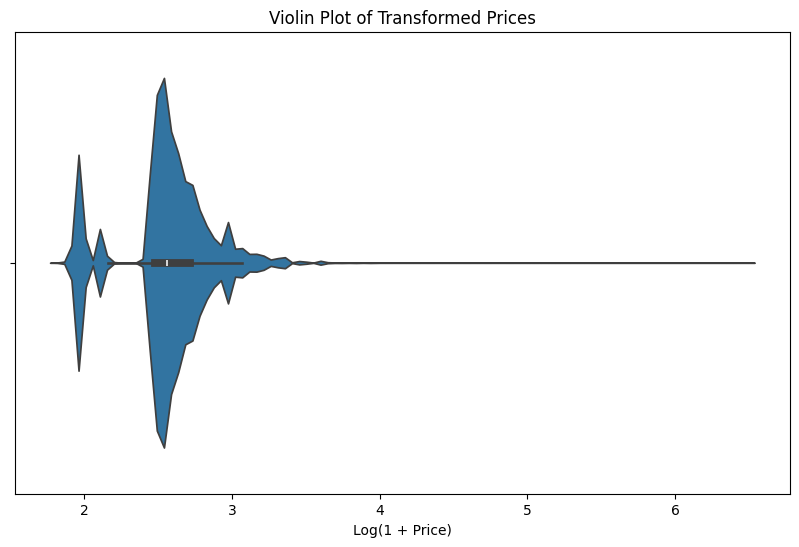

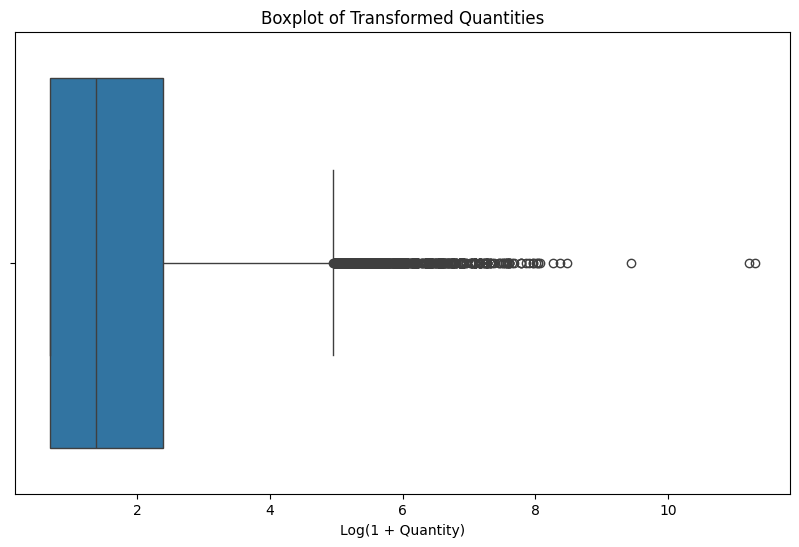

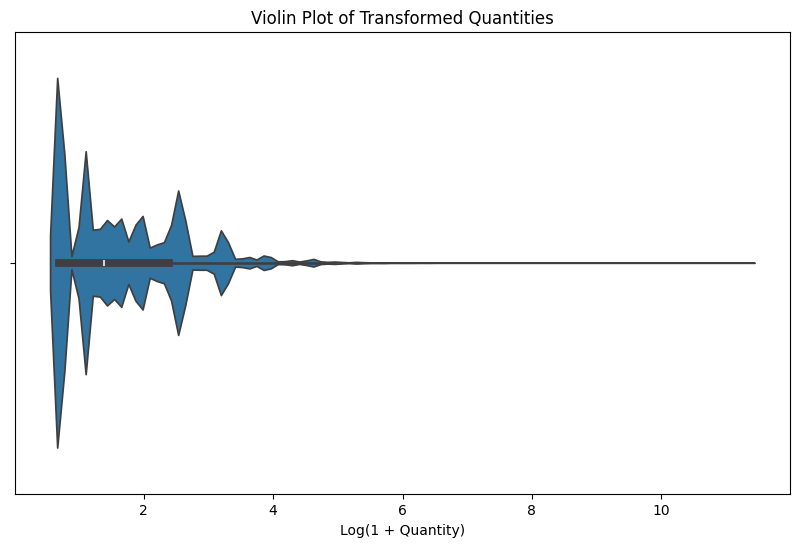

In [17]:
# Import necessary libraries
import numpy as np


# Logarithmic transformation of Price and Quantity
transformed_prices = np.log1p(data['Price'])  # log(1 + prices)
transformed_quantities = np.log1p(data['Quantity'])  # log(1 + quantities)

# Boxplot of Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_prices)
plt.title('Boxplot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Violin plot of Price
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_prices)
plt.title('Violin Plot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Boxplot of Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_quantities)
plt.title('Boxplot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()

# Violin plot of Quantity
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_quantities)
plt.title('Violin Plot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()


#### Isolation Forest: Anomaly Detection

*Introduction to Isolation Forest*

Isolation Forest is a machine learning algorithm designed to detect anomalies by isolating data points in a dataset. The key idea behind the algorithm is that anomalies are few in number and have values that are significantly different from the majority of the data. This makes them easier to isolate through recursive partitioning.

###### Why Are We Using Isolation Forest?
In our dataset, despite the initial removal of anomalies using the Z-score method, the data still appears scattered. This could mean there are hidden outliers or irregularities that are not captured by traditional statistical techniques. Isolation Forest provides a robust, efficient, and scalable way to:
1. Identify and isolate both global and local outliers.
2. Work with high-dimensional data, which is critical for our dataset that includes features like price, quantity, and country.
3. Ensure data quality by refining the dataset further, making it more reliable for subsequent analysis.

###### How Does Isolation Forest Help?
The algorithm works by:
- Randomly partitioning the data and creating a tree structure where shorter paths indicate anomalies.
- Assigning each data point an anomaly score, with higher scores representing more likely anomalies.
- Isolating data points that deviate significantly from the majority, ensuring we have a clean, high-quality dataset.

By applying Isolation Forest, we aim to:
- Enhance the overall quality of our dataset.
- Minimize noise caused by outliers in our data visualizations and statistical models.
- Build a strong foundation for accurate and meaningful insights in our analysis.

In the next step, we will implement the Isolation Forest algorithm to identify and remove outliers from our dataset.


In [18]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['Price', 'Quantity']])

# Filter out the anomalies
data_cleaned = data[data['anomaly'] == 1].drop(columns=['anomaly'])

# Display the number of anomalies detected
print(f"Number of anomalies detected: {data['anomaly'].value_counts().get(-1, 0)}")

Number of anomalies detected: 4778


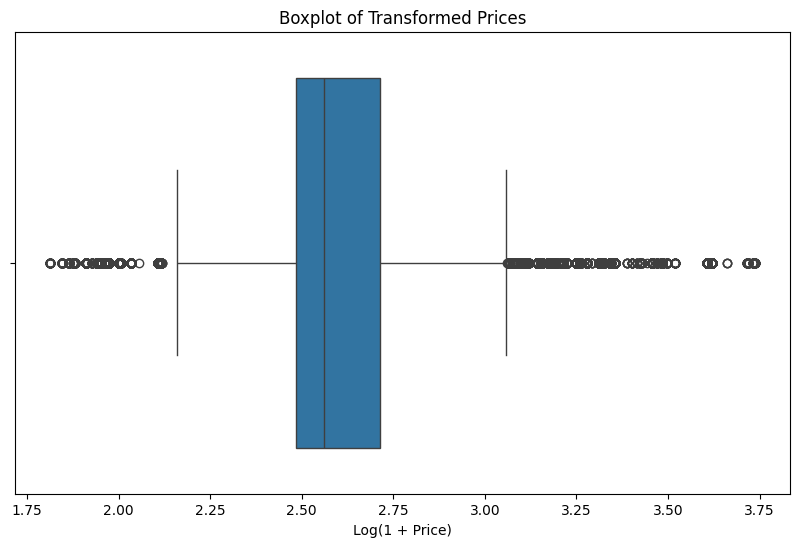

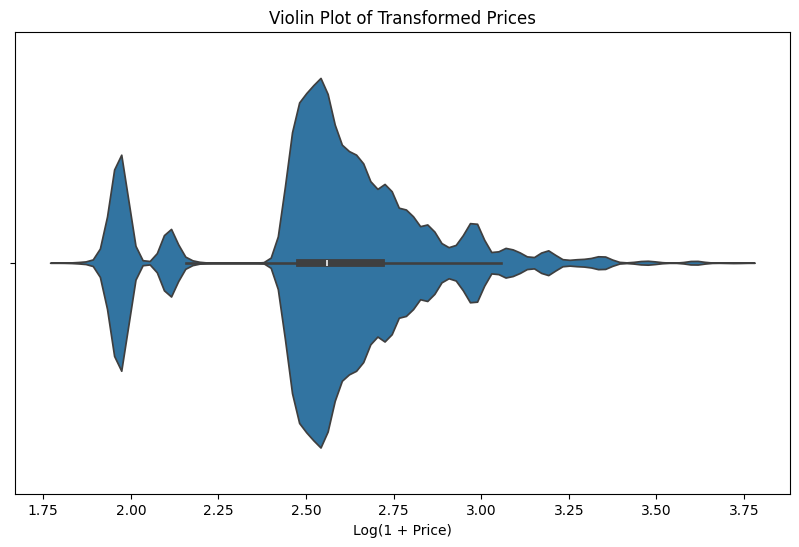

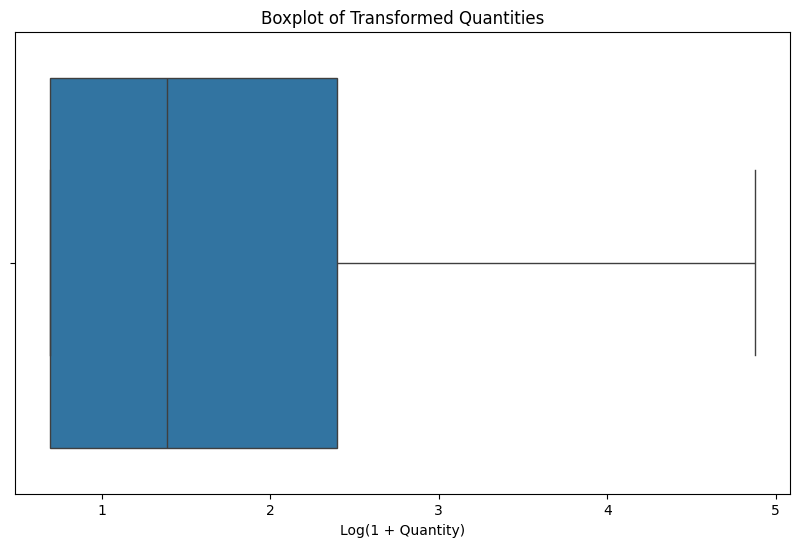

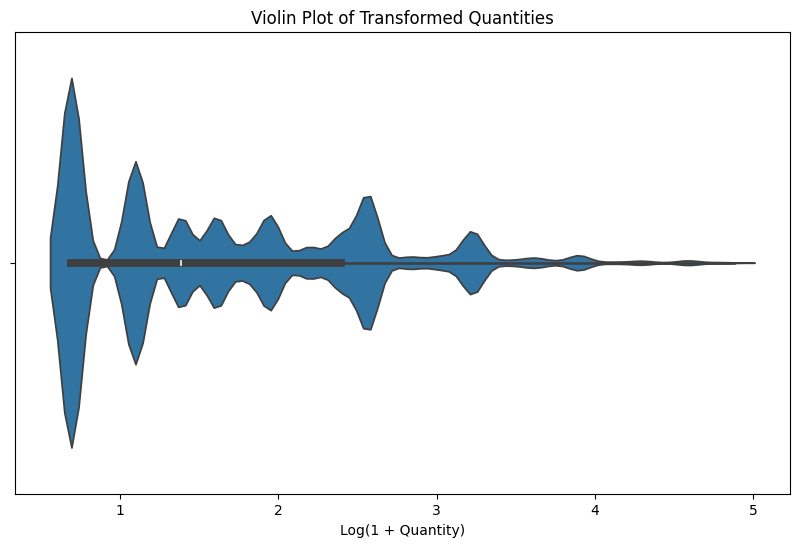

In [19]:
# Import necessary libraries
import numpy as np


# Logarithmic transformation of Price and Quantity
transformed_prices = np.log1p(data_cleaned['Price'])  # log(1 + prices)
transformed_quantities = np.log1p(data_cleaned['Quantity'])  # log(1 + quantities)

# Boxplot of Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_prices)
plt.title('Boxplot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Violin plot of Price
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_prices)
plt.title('Violin Plot of Transformed Prices')
plt.xlabel('Log(1 + Price)')
plt.show()

# Boxplot of Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=transformed_quantities)
plt.title('Boxplot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()

# Violin plot of Quantity
plt.figure(figsize=(10, 6))
sns.violinplot(x=transformed_quantities)
plt.title('Violin Plot of Transformed Quantities')
plt.xlabel('Log(1 + Quantity)')
plt.show()


In [20]:
# Save the cleaned dataset
data_cleaned.to_csv('../data/preprocessed_data/cleaned_sales.csv', index=False)

### Dates

In [21]:
# # Visualise the date column using seaborn

# # Aggregate the data by date
# daily_sales = data_cleaned.groupby('Date')['Price'].sum().reset_index()

# # Plot the daily sales
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='Date', y='Price', data=daily_sales)
# plt.title('Daily Sales')
# plt.xlabel('Date')
# plt.ylabel('Total Sales')
# plt.show()


In [22]:
# # Visualise the Date column
# # Aggregate data by day and plot the number of transactions over time.
# daily_transactions = data_cleaned['Date'].value_counts().sort_index()

# # Create a DataFrame for plotting
# x = daily_transactions.reset_index()
# x.columns = ['Date', 'Count']
# x['Month'] = x['Date'].dt.month_name()

# # Plot the data
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x='Date', y='Count', data=x, color='darkblue')
# plt.title("Scatter Plot of Daily Transactions")
# plt.xlabel("Date")
# plt.ylabel("Number of Transactions")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()